In [1]:
!pip install datasets
!pip install scikit-learn
!pip install ibm-watson-machine-learning==1.0.312

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 69.1 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm_watson_machine_learning 1.0.367
    Uninstalling ibm_watson_machine_learning-1.0.367:
      Successfully uninstalled ibm_watson_machine_learning-1.0.367
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoai-libs 2.0.19 requires pandas==2.1.*, but you have pandas 1.5.3 which is incompatible.
autoai-ts-libs 4.0.16 requires pandas==2.1.*, but you have pandas 1.5.3 which is incompatible.


In [37]:
!pip install matplotlib seaborn

In [2]:
import os, getpass
from pandas import read_csv

In [3]:
credetials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":getpass.getpass("Please enter your api key:")
}

Please enter your api key: ········


In [6]:
try:
    project_id = os.environ["PROJECT_ID"]
except KeyError:
    project_id = input("Please enter your project_id")

In [7]:
project_id

'50ebe483-da4a-46bc-bc98-679a1eba9d78'

In [ ]:
import os, types
import pandas as pd
from ibm_boto3 import client
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

cos_client = ibm_boto3.client(service_name = 's3',
                              ibm_api_key_id = 'Your api key here',
                              ibm_auth_endpoint = "https://iam.cloud.ibm.com/oidc/token",
                              config=Config(signature_version='oauth'),
                              endpoint_url='https://s3.us-south.cloud-object-storage.appdomain.cloud')
bucket = 'bucket-8r5wr3fk47phgz1'
object_key = 'train_data.csv' 

In [10]:
body = cos_client.get_object(Bucket = bucket, Key = object_key)['Body']
if not hasattr(body, "__iter__"): body.__iter__=types.MethodType(__iter__,body)
train_data = pd.read_csv(body)
train_data.head(5)

,ID,Gender,Status,Children,Age,Customer_Status,Car_Owner,Customer_Service,Satisfaction,Business_Area,Action
0,1000,Female,F,0,29.07,Active,Yes,"Vehicle was not clean upon delivery, disappoin...",1,Service: Orders/Contracts,Standard Pickup
1,1001,Male,F,0,29.08,Active,No,"All went quite smoothly... it was Enterprise, ...",0,Service: Accessibility,Visit Nearest Center
2,1002,Male,F,3,52.70,Inactive,No,"Long waiting time for pickup, very inconvenient.",0,Service: Attitude,Contact Support
3,1003,Female,M,2,22.79,Active,Yes,"Vehicle was not clean upon delivery, disappoin...",1,Service: Accessibility,On-demand pickup location
4,1004,Female,F,1,36.25,Active,No,"Very friendly service from the staff, quick an...",0,Service: Attitude,Contact Support


In [14]:
import os, types
import pandas as pd
from ibm_boto3 import client
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

cos_client = ibm_boto3.client(service_name = 's3',
                              ibm_api_key_id = 'Za1PY3UFd70BYBXgmcb9PzIjRaJS3Ro7VItoIQWnF6zu',
                              ibm_auth_endpoint = "https://iam.cloud.ibm.com/oidc/token",
                              config=Config(signature_version='oauth'),
                              endpoint_url='https://s3.us-south.cloud-object-storage.appdomain.cloud')
bucket = 'bucket-8r5wr3fk47phgz1'
object_key = 'test_data.csv' 

body = cos_client.get_object(Bucket = bucket, Key = object_key)['Body']
if not hasattr(body, "__iter__"): body.__iter__=types.MethodType(__iter__,body)
test_data = pd.read_csv(body)
test_data.head(5)


,ID,Gender,Status,Children,Age,Customer_Status,Car_Owner,Customer_Service,Satisfaction,Business_Area,Action
0,1000,Male,M,2,48.88,Active,Yes,"Long waiting time for pickup, very inconvenient.",1,Product: Pricing and Billing,Visit Nearest Center
1,1001,Female,F,2,65.41,Active,Yes,"All went quite smoothly... it was Enterprise, ...",1,Service: Accessibility,On-demand pickup location
2,1002,Female,F,0,63.00,Inactive,Yes,"Very friendly service from the staff, quick an...",1,Service: Accessibility,NaN
3,1003,Female,F,0,19.43,Inactive,Yes,Excellent response dealing with child seat.,1,Service: Attitude,Standard Pickup
4,1004,Female,F,1,21.16,Inactive,Yes,The agent subsequently offered me a car type o...,0,Product: Pricing and Billing,Free Upgrade


In [15]:
from ibm_watson_machine_learning.foundation_models.utils.enums import ModelTypes

In [16]:
model_id = ModelTypes.FLAN_UL2

In [17]:
satisfaction_instruction = """
You are a customer service assistant analyzing user reviews of car rentals. 
Your task is to classify whether the customer was satisfied or unsatisfied. 
Use tone, emotional cues, and stated experience to decide.

Output 1 if the customer seems satisfied, 0 if not.

Examples:

comment: The car arrived on time, the condition was excellent, and the check-in process was seamless. Great experience overall!
satisfaction: 1

comment: I waited over an hour to get the car, and the staff didn’t explain anything. I felt completely ignored.
satisfaction: 0

comment: Vehicle was clean and in good condition. Staff was courteous. Would recommend.
satisfaction: 1

comment: The AC didn’t work, and I couldn’t get a replacement. The support team was unhelpful.
satisfaction: 0

comment: The price was fair, and the return process was quick. No issues.
satisfaction: 1

comment: I was given the wrong car model, and the staff argued when I complained. Extremely disappointed.
satisfaction: 0

comment: The pickup location was slightly hard to find, but the car and service made up for it. Would book again.
satisfaction: 1

comment: I have had a few recent rentals that have taken a very long time, with no offer of apology. In the most recent case, the agent offered me an upgrade coupon, but told me it was no longer available because it had just been given out.
satisfaction: 0
"""


In [18]:
from ibm_watson_machine_learning.metanames import GenTextParamsMetaNames as GenParams
parameters = {
    GenParams.MAX_NEW_TOKENS:10
}

In [21]:
from ibm_watson_machine_learning.foundation_models import Model
model = Model(
    model_id = model_id,
    params = parameters,
    credentials = credetials,
    project_id = project_id
)

In [33]:
feature_instruction = """
You are a customer service analyst reviewing customer feedback. Identify specific service-related issues mentioned in the comment.

List key complaints or service highlights as bullet points.

Examples:
comment: The car arrived late and the brakes were noisy.
issues:
- Late delivery
- Poor car condition (brakes)

comment: The car was clean and staff was friendly.
issues:
- Clean car
- Friendly staff
"""

In [35]:
import time
comments = list(test_data.Customer_Service)
sentiment_labels = []
extracted_issues = []

for comment in comments:
    sat_prompt = f"{satisfaction_instruction}\ncomment: {comment}"
    result = model.generate_text(prompt=sat_prompt)
    sentiment_labels.append(result.strip().split(":")[-1].strip()) 

    feat_prompt = f"{feature_instruction}\ncomment: {comment}"
    issues = model.generate_text(prompt=feat_prompt)
    extracted_issues.append(issues.strip())
    
    time.sleep(0.6) 


In [36]:
test_data["Predicted_Sentiment"] = sentiment_labels
test_data["Extracted_Issues"] = extracted_issues
test_data.to_csv("review_analysis_output.csv", index=False)
test_data.to_excel("review_analysis_output.xlsx", index=False)

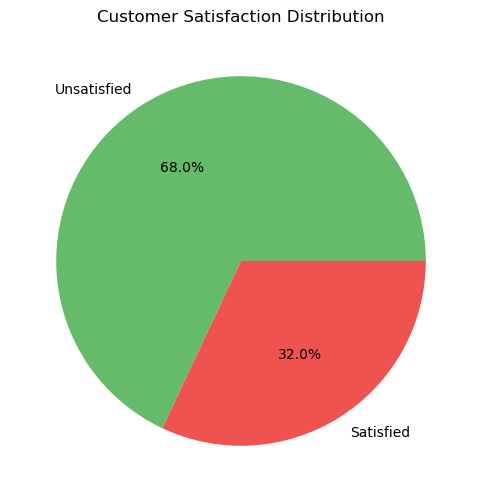

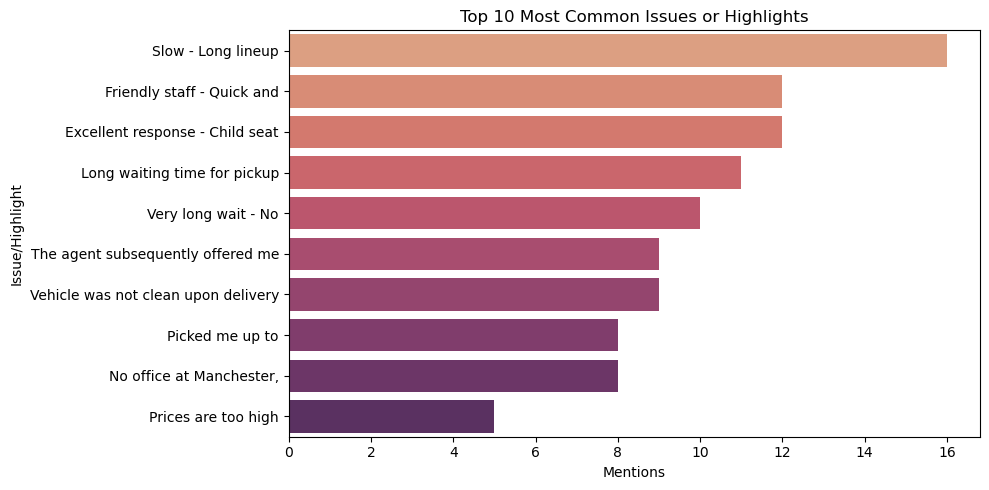

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

sentiment_counts = test_data["Predicted_Sentiment"].value_counts()
labels = ['Satisfied' if s == '1' else 'Unsatisfied' for s in sentiment_counts.index]

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=['#66bb6a', '#ef5350'])
plt.title("Customer Satisfaction Distribution")
plt.show()
all_issues = []
for item in test_data["Extracted_Issues"]:
    bullets = re.findall(r"-\s*(.*)", item)
    all_issues.extend(bullets)

issue_counts = Counter(all_issues)
top_issues = issue_counts.most_common(10) 

issue_df = pd.DataFrame(top_issues, columns=["Issue", "Count"])

plt.figure(figsize=(10,5))
sns.barplot(data=issue_df, y="Issue", x="Count", palette="flare")
plt.title("Top 10 Most Common Issues or Highlights")
plt.xlabel("Mentions")
plt.ylabel("Issue/Highlight")
plt.tight_layout()
plt.show()